In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)


2.9.1
sys.version_info(major=3, minor=8, micro=10, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.23.1
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.9.1
keras.api._v2.keras 2.9.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784]
x_train_scaled = scaler.fit_transform(
    x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(
    x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(
    x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)


In [6]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu"))  # selu
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.001),
              metrics = ["accuracy"])

In [7]:
help(keras.layers.Dense)  # 可以查看源码

Help on class Dense in module keras.layers.core.dense:

class Dense(keras.engine.base_layer.Layer)
 |  Dense(*args, **kwargs)
 |  
 |  Just your regular densely-connected NN layer.
 |  
 |  `Dense` implements the operation:
 |  `output = activation(dot(input, kernel) + bias)`
 |  where `activation` is the element-wise activation function
 |  passed as the `activation` argument, `kernel` is a weights matrix
 |  created by the layer, and `bias` is a bias vector created by the layer
 |  (only applicable if `use_bias` is `True`). These are all attributes of
 |  `Dense`.
 |  
 |  Note: If the input to the layer has a rank greater than 2, then `Dense`
 |  computes the dot product between the `inputs` and the `kernel` along the
 |  last axis of the `inputs` and axis 0 of the `kernel` (using `tf.tensordot`).
 |  For example, if input has dimensions `(batch_size, d0, d1)`,
 |  then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 |  along axis 2 of the `input`, on every

In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               78500     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 100)               10100     
                                                                 
 dense_24 (Dense)            (None, 100)               10100     
                                                                 
 dense_25 (Dense)            (None, 100)               10100     
                                                                 
 dense_26 (Dense)            (None, 100)              

In [9]:
len(model.layers)

22

In [10]:
# Tensorboard, earlystopping, ModelCheckpoint
logdir = './dnn-selu-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,
                                 "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file,
                                    save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2),
]
history = model.fit(x_train_scaled, y_train, epochs=100,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Epoch 1/100


2022-07-21 23:17:00.047153: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 [==============================] - 6s 3ms/step - loss: 0.6840 - accuracy: 0.7611 - val_loss: 0.5185 - val_accuracy: 0.8128
Epoch 2/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4798 - accuracy: 0.8285 - val_loss: 0.4542 - val_accuracy: 0.8380
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4291 - accuracy: 0.8446 - val_loss: 0.4229 - val_accuracy: 0.8478
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3991 - accuracy: 0.8555 - val_loss: 0.4020 - val_accuracy: 0.8550
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3756 - accuracy: 0.8643 - val_loss: 0.4062 - val_accuracy: 0.8548
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3583 - accuracy: 0.8704 - val_loss: 0.3917 - val_accuracy: 0.8612
Epoch 7/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3445 - accuracy: 0.8744 - val_loss: 0.3803 - val_accuracy: 0.85

In [11]:
print(history.history)

{'loss': [0.6840143203735352, 0.4797609746456146, 0.42913466691970825, 0.3991462290287018, 0.37563472986221313, 0.3583014905452728, 0.34453579783439636, 0.3319484293460846, 0.3210045099258423, 0.3114950656890869, 0.3033101260662079, 0.2945024371147156, 0.2872566878795624, 0.28007784485816956, 0.27309921383857727], 'accuracy': [0.761054515838623, 0.8284727334976196, 0.8446363806724548, 0.8554545640945435, 0.8642908930778503, 0.8704000115394592, 0.8744000196456909, 0.8797818422317505, 0.8828727006912231, 0.8852182030677795, 0.8884181976318359, 0.8913999795913696, 0.8938000202178955, 0.8961818218231201, 0.8990727066993713], 'val_loss': [0.5184644460678101, 0.45415663719177246, 0.4228820204734802, 0.40200501680374146, 0.4061632454395294, 0.39165908098220825, 0.38029393553733826, 0.3664225935935974, 0.35827916860580444, 0.3501482605934143, 0.3477729856967926, 0.3563908040523529, 0.3494749367237091, 0.34400057792663574, 0.34757694602012634], 'val_accuracy': [0.8127999901771545, 0.83799999952

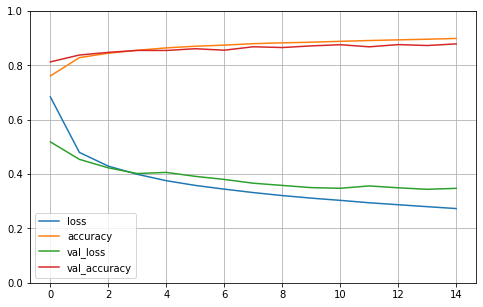

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [14]:
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.39170411229133606, 0.8626000285148621]